# 1-Introduction 
Hamburg is the second largest city in Germany after Berlin and the 7th largest city in the European Union with a population of over 1.84 million. Hamburg is Europe’s third largest port and different big companies (as Airbus, Grüner + Jahr, Beiersdorf, , Blohm + Voss, and Der Spiegel and Die Zeit, between others) are based in this German city. The location of these big companies and tourist sights  as the Speicherstadt, Kontorhausviertel (UNESCO World Heritage Sites), as the Elbphilarmonie, Hamburger Rathaus bring almost 7 million visitors (data from 2017) and a revenue of 9 billion €. This amount of visitors brings the goal of this project: Where is the neighborhood with more number of restaurants? Which variety of food is served there? Which is the most popular kind of food served in Hamburg? 

The answer of these questions can also answer: If I want to open a restaurant, where I should open? Should I decide in the most populated neighborhood or should I decide the most popular neighborhood to open a restaurant? Which kind of food should be my restaurant?



# Needed Libraries


In [1]:
#IMPORT needed Libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from bs4 import BeautifulSoup

print('Libraries imported.')



You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Solving environment: done

# All requested packages already installed.

Libraries imported.


# 2 Data
- Districts and Population from Hamburg (from different years, I will use the most recent data from there) : https://www.citypopulation.de/en/germany/hamburg/admin/
- Latitude and Longitude values from Hamburg are obtained from wikipedia: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs(Since there are different tables, and I had troubles to get the desired data, I created a csv file with the coordinates)
- Restaurants obtained from Foursquare

# 3 Analysis

In [2]:
#Using BeautifulSoup as indicated as hint
path_wiki= requests.get("https://www.citypopulation.de/en/germany/hamburg/admin/").text
soup=BeautifulSoup(path_wiki,'lxml')
print(soup.title)

from IPython.display import display_html
tabla = str(soup.table)
display_html(tabla,raw=True)

<title>Germany: Hamburg (Boroughs and Quarters) - Population Statistics, Charts and Map</title>


Name,Status,PopulationEstimate2002-12-31,PopulationEstimate2007-12-31,PopulationEstimate2012-12-31,PopulationEstimate2017-12-31,PopulationEstimate2019-12-31,
Altona,Borough,...,"257,299","257,412","270,263","275,265",→
Altona-Altstadt,Quarter,"27,550","26,918","28,174","29,034","29,170",→
Altona-Nord,Quarter,"21,662","22,521","21,759","22,137","24,536",→
Bahrenfeld,Quarter,"26,343","27,193","27,165","31,047","30,203",→
Blankenese,Quarter,"13,452","13,435","13,016","13,407","13,730",→
Groß Flottbek,Quarter,"10,953","11,116","10,672","10,955","11,111",→
Iserbrook,Quarter,"10,463","10,644","11,026","11,324","11,423",→
Lurup,Quarter,"32,851","33,855","34,196","36,053","36,610",→
Nienstedten,Quarter,"6,330","6,813","7,250","7,238","7,181",→
Osdorf,Quarter,"26,084","25,487","25,495","26,140","26,565",→


In [3]:
df_tabla = pd.read_html(tabla)
df_tabla[0]

,Name,Status,PopulationEstimate2002-12-31,PopulationEstimate2007-12-31,PopulationEstimate2012-12-31,PopulationEstimate2017-12-31,PopulationEstimate2019-12-31,Unnamed: 7
0,Altona,Borough,...,257299,257412,270263,275265,→
1,Altona-Altstadt,Quarter,27550,26918,28174,29034,29170,→
2,Altona-Nord,Quarter,21662,22521,21759,22137,24536,→
3,Bahrenfeld,Quarter,26343,27193,27165,31047,30203,→
4,Blankenese,Quarter,13452,13435,13016,13407,13730,→
5,Groß Flottbek,Quarter,10953,11116,10672,10955,11111,→
6,Iserbrook,Quarter,10463,10644,11026,11324,11423,→
7,Lurup,Quarter,32851,33855,34196,36053,36610,→
8,Nienstedten,Quarter,6330,6813,7250,7238,7181,→
9,Osdorf,Quarter,26084,25487,25495,26140,26565,→


In [4]:
#Keep only Quarter and 2019 information
df_quarter = df_tabla[0][df_tabla[0]['Status'] == 'Quarter']
df_quarter

,Name,Status,PopulationEstimate2002-12-31,PopulationEstimate2007-12-31,PopulationEstimate2012-12-31,PopulationEstimate2017-12-31,PopulationEstimate2019-12-31,Unnamed: 7
1,Altona-Altstadt,Quarter,27550,26918,28174,29034,29170,→
2,Altona-Nord,Quarter,21662,22521,21759,22137,24536,→
3,Bahrenfeld,Quarter,26343,27193,27165,31047,30203,→
4,Blankenese,Quarter,13452,13435,13016,13407,13730,→
5,Groß Flottbek,Quarter,10953,11116,10672,10955,11111,→
6,Iserbrook,Quarter,10463,10644,11026,11324,11423,→
7,Lurup,Quarter,32851,33855,34196,36053,36610,→
8,Nienstedten,Quarter,6330,6813,7250,7238,7181,→
9,Osdorf,Quarter,26084,25487,25495,26140,26565,→
10,Othmarschen,Quarter,11344,12227,12827,14893,15737,→


In [5]:
df_2019 = df_quarter[['Name', 'Status', 'PopulationEstimate2019-12-31']]
df_2019.sort_values(by='PopulationEstimate2019-12-31', ascending=False).head()

,Name,Status,PopulationEstimate2019-12-31
104,Rahlstedt,Quarter,92087
42,Billstedt,Quarter,70410
32,Eimsbüttel,Quarter,58005
74,Winterhude,Quarter,55492
60,Wilhelmsburg,Quarter,53519


In [6]:
df_2019.shape

(104, 3)

In [7]:
#I have problems to get the second table of the coordinates from Wikipedia, so I use an own CSV file with the coordinates

In [8]:
pd_coordinates=pd.read_csv('Downloads/coordinates.csv', sep=';')
pd_coordinates.head()

,Stadtteil,Bezirk,Fläche\n(km²),Einwohner,Bevölkerungs­dichte\n(Einwohner/km²),Koordinaten
0,Hamburg-Altstadt,Hamburg-Mitte,"2,4",2350.000,979,"53° 33′ 0″ N, 10° 0′ 0″ O"
1,HafenCity,Hamburg-Mitte,"2,2",4925.000,2239,"53° 32′ 28″ N, 10° 0′ 1″ O"
2,Neustadt,Hamburg-Mitte,"2,3",12.762,5549,"53° 33′ 7″ N, 9° 59′ 8″ O"
3,St. Pauli,Hamburg-Mitte,"2,5",22.097,8839,"53° 33′ 25″ N, 9° 57′ 50″ O"
4,St. Georg,Hamburg-Mitte,"2,4",11.358,4733,"53° 33′ 18″ N, 10° 0′ 44″ O"


In [9]:
df_coordinates = pd_coordinates[['Stadtteil', 'Koordinaten']] 
df_coordinates[['Koordinaten','Longitude']] = pd_coordinates['Koordinaten'].str.split(',',expand=True)
df_coordinates.rename(columns={'Stadtteil': 'Name','Koordinaten':'Latitude'}, inplace=True)
df_coordinates

/Users/nacho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/nacho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Name,Latitude,Longitude
0,Hamburg-Altstadt,53° 33′ 0″ N,10° 0′ 0″ O
1,HafenCity,53° 32′ 28″ N,10° 0′ 1″ O
2,Neustadt,53° 33′ 7″ N,9° 59′ 8″ O
3,St. Pauli,53° 33′ 25″ N,9° 57′ 50″ O
4,St. Georg,53° 33′ 18″ N,10° 0′ 44″ O
5,Hammerbrook,53° 32′ 43″ N,10° 1′ 50″ O
6,Borgfelde,53° 33′ 17″ N,10° 2′ 4″ O
7,Hamm,53° 33′ 39″ N,10° 3′ 28″ O
8,Horn,53° 33′ 14″ N,10° 5′ 24″ O
9,Billstedt,53° 32′ 26″ N,10° 6′ 4″ O


In [10]:
table_merged = pd.merge(df_coordinates, df_2019, on = "Name")
table_merged['Latitude'] = table_merged['Latitude'].str.replace(u'\xa0', u'')
table_merged['Longitude'] = table_merged['Longitude'].str.replace(u'\xa0', u'')
table_merged

,Name,Latitude,Longitude,Status,PopulationEstimate2019-12-31
0,Hamburg-Altstadt,53°33′0″N,10°0′0″O,Quarter,2350
1,HafenCity,53°32′28″N,10°0′1″O,Quarter,4925
2,Neustadt,53°33′7″N,9°59′8″O,Quarter,12762
3,St. Pauli,53°33′25″N,9°57′50″O,Quarter,22097
4,St. Georg,53°33′18″N,10°0′44″O,Quarter,11358
5,Hammerbrook,53°32′43″N,10°1′50″O,Quarter,4619
6,Borgfelde,53°33′17″N,10°2′4″O,Quarter,8343
7,Horn,53°33′14″N,10°5′24″O,Quarter,38373
8,Billstedt,53°32′26″N,10°6′4″O,Quarter,70410
9,Billbrook,53°31′40″N,10°5′10″O,Quarter,1740


In [11]:
table_merged.head()

,Name,Latitude,Longitude,Status,PopulationEstimate2019-12-31
0,Hamburg-Altstadt,53°33′0″N,10°0′0″O,Quarter,2350
1,HafenCity,53°32′28″N,10°0′1″O,Quarter,4925
2,Neustadt,53°33′7″N,9°59′8″O,Quarter,12762
3,St. Pauli,53°33′25″N,9°57′50″O,Quarter,22097
4,St. Georg,53°33′18″N,10°0′44″O,Quarter,11358


In [12]:
lat_dec=[]
long_dec=[]
#DEC = (DEG + (MIN * 1/60) + (SEC * 1/60 * 1/60))
#Assumes S/W are negative. 
#In german O is "Osten" and it is "East" in English
table_merged['Longitude'][0]
import re
def dms2dec(dms_str):
    dms_str = re.sub(r'\s', '', dms_str)
    
    sign = -1 if re.search('[swSW]', dms_str) else 1
    
    numbers = [*filter(len, re.split('\D+', dms_str, maxsplit=4))]

    degree = numbers[0]
    minute = numbers[1] if len(numbers) >= 2 else '0'
    second = numbers[2] if len(numbers) >= 3 else '0'
    frac_seconds = numbers[3] if len(numbers) >= 4 else '0'
    
    second += "." + frac_seconds
    return sign * (int(degree) + float(minute) / 60 + float(second) / 3600)

In [23]:
table_merged['Longitude_dec'] = table_merged.apply(lambda row: dms2dec(row.Longitude)  
                                  , axis = 1) 
  
table_merged['Latitude_dec'] = table_merged.apply(lambda row: dms2dec(row.Latitude)  
                                  , axis = 1) 
  
table_merged.sort_values(by=['PopulationEstimate2019-12-31'], ascending=False).head()


,Name,Latitude,Longitude,Status,PopulationEstimate2019-12-31,Longitude_dec,Latitude_dec
70,Rahlstedt,53°36′7″N,10°9′24″O,Quarter,92087,10.156667,53.601944
8,Billstedt,53°32′26″N,10°6′4″O,Quarter,70410,10.101111,53.540556
31,Eimsbüttel,53°34′33″N,9°57′6″O,Quarter,58005,9.951667,53.575833
44,Winterhude,53°36′0″N,10°0′0″O,Quarter,55492,10.000000,53.600000
12,Wilhelmsburg,53°29′42″N,10°0′40″O,Quarter,53519,10.011111,53.495000


In [27]:
table_merged.drop(['Latitude', 'Longitude'], axis=1)

,Name,Status,PopulationEstimate2019-12-31,Longitude_dec,Latitude_dec
0,Hamburg-Altstadt,Quarter,2350,10.000000,53.550000
1,HafenCity,Quarter,4925,10.000278,53.541111
2,Neustadt,Quarter,12762,9.985556,53.551944
3,St. Pauli,Quarter,22097,9.963889,53.556944
4,St. Georg,Quarter,11358,10.012222,53.555000
5,Hammerbrook,Quarter,4619,10.030556,53.545278
6,Borgfelde,Quarter,8343,10.034444,53.554722
7,Horn,Quarter,38373,10.090000,53.553889
8,Billstedt,Quarter,70410,10.101111,53.540556
9,Billbrook,Quarter,1740,10.086111,53.527778


In [26]:
table_merged.sort_values(by=['PopulationEstimate2019-12-31'], ascending=False).head()

,Name,Latitude,Longitude,Status,PopulationEstimate2019-12-31,Longitude_dec,Latitude_dec
70,Rahlstedt,53°36′7″N,10°9′24″O,Quarter,92087,10.156667,53.601944
8,Billstedt,53°32′26″N,10°6′4″O,Quarter,70410,10.101111,53.540556
31,Eimsbüttel,53°34′33″N,9°57′6″O,Quarter,58005,9.951667,53.575833
44,Winterhude,53°36′0″N,10°0′0″O,Quarter,55492,10.000000,53.600000
12,Wilhelmsburg,53°29′42″N,10°0′40″O,Quarter,53519,10.011111,53.495000


In [ ]:
#FOURSQUARE API

In [16]:
CLIENT_ID = 'YZKVAUBKXF14VLPLSZG43FUSVT3UODC2IGCUAXOVROXNWKSQ' # your Foursquare ID
CLIENT_SECRET = 'VJMCK0TVH1W3YMLTSG4I3LL2GHOUIANBBS3KEYB4X3BVILQ4' # your Foursquare Secret
ACCESS_TOKEN = 'V3VBTABJRZA2WKOYLLNJ2P42NPO3GK100ISORBT3QFD5TFOD' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
hamburg_venues = getNearbyVenues(names=table_merged['Name'],
                                   latitudes=table_merged['Latitude_dec'],
                                   longitudes=table_merged['Longitude_dec']
                                  )
print(hamburg_venues.shape)



Hamburg-Altstadt
HafenCity
Neustadt
St. Pauli
St. Georg
Hammerbrook
Borgfelde
Horn
Billstedt
Billbrook
Rothenburgsort
Veddel
Wilhelmsburg
Kleiner Grasbrook
Steinwerder
Waltershof
Finkenwerder
Altona-Altstadt
Sternschanze
Altona-Nord
Ottensen
Bahrenfeld
Groß Flottbek
Othmarschen
Lurup
Osdorf
Nienstedten
Blankenese
Iserbrook
Sülldorf
Rissen
Eimsbüttel
Rotherbaum
Harvestehude
Hoheluft-West
Lokstedt
Niendorf
Schnelsen
Eidelstedt
Stellingen
Hoheluft-Ost
Eppendorf
Groß Borstel
Alsterdorf
Winterhude
Uhlenhorst
Hohenfelde
Barmbek-Süd
Dulsberg
Barmbek-Nord
Ohlsdorf
Fuhlsbüttel
Langenhorn
Eilbek
Wandsbek
Marienthal
Jenfeld
Tonndorf
Farmsen-Berne
Bramfeld
Steilshoop
Wellingsbüttel
Sasel
Poppenbüttel
Hummelsbüttel
Lemsahl-Mellingstedt
Duvenstedt
Wohldorf-Ohlstedt
Bergstedt
Volksdorf
Rahlstedt
Lohbrügge
Bergedorf
Curslack
Altengamme
Neuengamme
Kirchwerder
Ochsenwerder
Reitbrook
Allermöhe
Billwerder
Moorfleet
Tatenberg
Spadenland
Harburg
Neuland
Gut Moor
Wilstorf
Rönneburg
Langenbek
Sinstorf
Marmsto

In [19]:
#Only Restaurants in Hamburg
hamburg_venues= hamburg_venues[hamburg_venues['Venue Category'].str.contains("Restaurant" )]
hamburg_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hamburg-Altstadt,53.550000,10.000000,GOOT - Finest Cuts,53.548509,10.000675,Comfort Food Restaurant
2,Hamburg-Altstadt,53.550000,10.000000,O-ren Ishii,53.548291,9.997890,Vietnamese Restaurant
4,Hamburg-Altstadt,53.550000,10.000000,Mi Chii,53.548320,9.998530,Vietnamese Restaurant
7,Hamburg-Altstadt,53.550000,10.000000,Sakura Sushi,53.552442,10.000058,Sushi Restaurant
8,Hamburg-Altstadt,53.550000,10.000000,Picasso,53.549934,9.995627,Spanish Restaurant
10,Hamburg-Altstadt,53.550000,10.000000,Tschebull,53.551419,10.003052,Austrian Restaurant
19,Hamburg-Altstadt,53.550000,10.000000,Seoul1988,53.548073,9.999942,Korean Restaurant
29,Hamburg-Altstadt,53.550000,10.000000,Perle,53.548386,9.998831,German Restaurant
36,Hamburg-Altstadt,53.550000,10.000000,Comida,53.552146,9.999825,Mexican Restaurant
38,Hamburg-Altstadt,53.550000,10.000000,Huang,53.550098,10.002792,Asian Restaurant


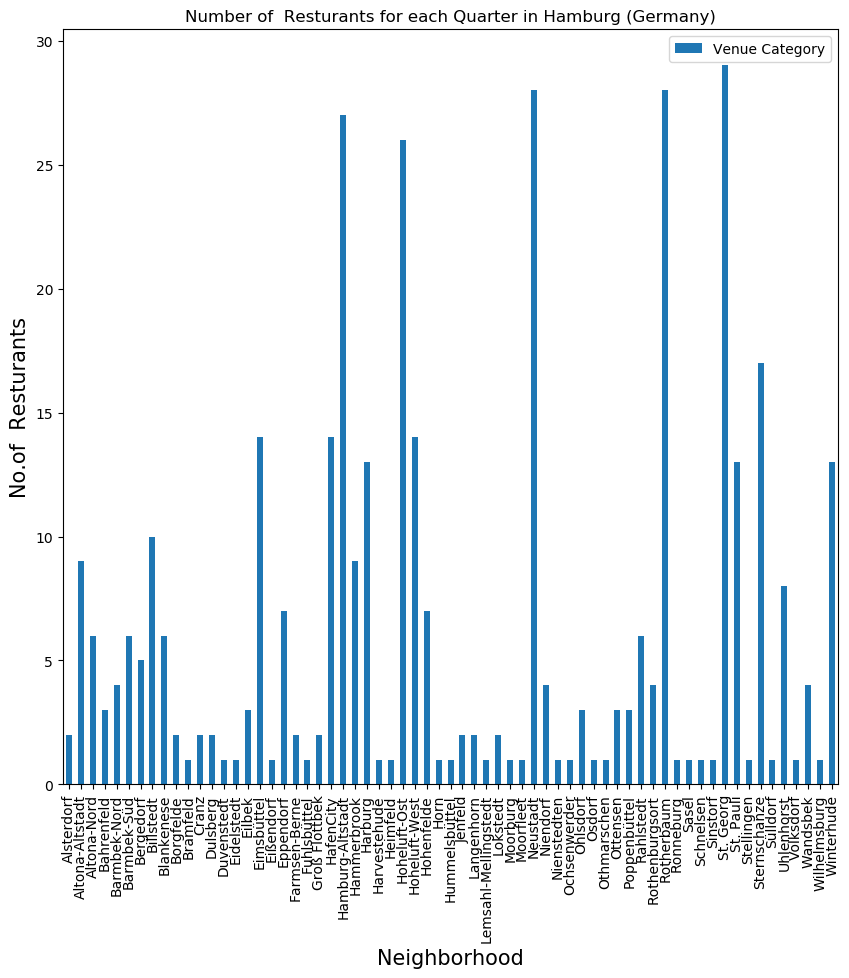

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), dpi = 100)
# title
plt.title('Number of  Resturants for each Quarter in Hamburg (Germany)')
#On x-axis
plt.xlabel('Quarter', fontsize = 15)
#On y-axis
plt.ylabel('No.of  Resturants', fontsize=15)
#giving a bar plot
hamburg_venues.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [40]:
hamburg_venues.groupby('Neighborhood')['Venue Category'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,Neighborhood,count
55,St. Georg,29
39,Neustadt,28
50,Rotherbaum,28
23,Hamburg-Altstadt,27
28,Hoheluft-Ost,26


Here we see that the neighborhoods with more number of restaurants are:
- St Georg
- Rotherbaum
- Neustadt
- Hamburg Alstadt
- Hoheluft-Ost

We can also get the most occuring restaurants in all the Quarters in Hamburg


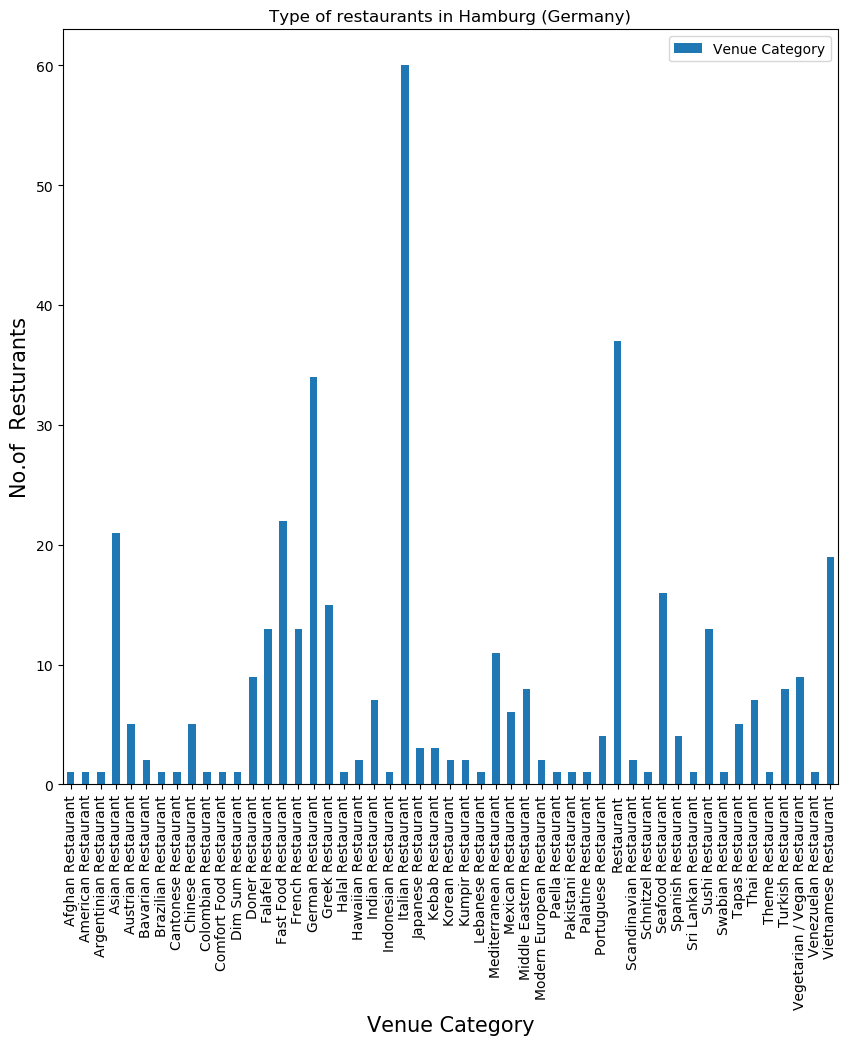

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), dpi = 100)
# title
plt.title('Type of restaurants in Hamburg (Germany)')
#On x-axis
plt.xlabel('Quarter', fontsize = 15)
#On y-axis
plt.ylabel('No.of  Resturants', fontsize=15)
#giving a bar plot
hamburg_venues.groupby('Venue Category')['Venue Category'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [38]:
hamburg_venues.groupby('Venue Category')['Neighborhood'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,Venue Category,count
22,Italian Restaurant,60
36,Restaurant,37
16,German Restaurant,34
14,Fast Food Restaurant,22
3,Asian Restaurant,21


In [47]:
hamburg_venues['COUNTER']=1
hamburg_venues.groupby(['Neighborhood', 'Venue Category'])['COUNTER'].sum()

Neighborhood          Venue Category               
Alsterdorf            Doner Restaurant                 1
                      Greek Restaurant                 1
Altona-Altstadt       Italian Restaurant               2
                      Mexican Restaurant               1
                      Restaurant                       2
                      Seafood Restaurant               1
                      Tapas Restaurant                 1
                      Thai Restaurant                  1
                      Turkish Restaurant               1
Altona-Nord           French Restaurant                1
                      German Restaurant                1
                      Indian Restaurant                1
                      Restaurant                       1
                      Sri Lankan Restaurant            1
                      Venezuelan Restaurant            1
Bahrenfeld            Asian Restaurant                 1
                      Italian Restau

In [62]:
type_restaurant = hamburg_venues[hamburg_venues['Neighborhood'].isin(['St. Georg', 'Rotherbaum', 'Neustadt', 'Hamburg-Altstadt', 'Hoheluft-Ost'])]
type_restaurant = type_restaurant[type_restaurant['Venue Category'].isin(['Italian Restaurant', 'Restaurant','German Restaurant', 'Fast Food Restaurant', 'Asian Restaurant'])]
type_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,COUNTER
29,Hamburg-Altstadt,53.550000,10.000000,Perle,53.548386,9.998831,German Restaurant,1
38,Hamburg-Altstadt,53.550000,10.000000,Huang,53.550098,10.002792,Asian Restaurant,1
43,Hamburg-Altstadt,53.550000,10.000000,Apples Restaurant,53.551390,10.003106,Restaurant,1
48,Hamburg-Altstadt,53.550000,10.000000,Kinneloa,53.551418,9.995393,Restaurant,1
52,Hamburg-Altstadt,53.550000,10.000000,Mutterland Cölln's,53.548832,9.994156,German Restaurant,1
55,Hamburg-Altstadt,53.550000,10.000000,Restaurant Heldenplatz,53.546709,9.997031,Restaurant,1
65,Hamburg-Altstadt,53.550000,10.000000,Nakama,53.547428,9.995357,Asian Restaurant,1
67,Hamburg-Altstadt,53.550000,10.000000,Herr Kwong,53.549257,10.001420,Asian Restaurant,1
75,Hamburg-Altstadt,53.550000,10.000000,Im Sprinkenhof,53.548480,10.003400,German Restaurant,1
77,Hamburg-Altstadt,53.550000,10.000000,frittenwerk,53.551136,9.994500,Fast Food Restaurant,1


In [65]:
latitude_hamburg= 53.551086
longitude_hamburg= 9.993682
map_hamburg = folium.Map(location=[latitude_hamburg, longitude_hamburg], zoom_start=10)

# add markers to map
for lat, lng, name_restaurant, neighborhood, cat in zip(type_restaurant['Venue Latitude'], type_restaurant['Venue Longitude'], type_restaurant['Venue'], \
                                                        type_restaurant['Neighborhood'],type_restaurant['Venue Category'] ):
    label = '{}'.format(name_restaurant + '(' + cat + ')' + '-' + neighborhood)
    label = folium.Popup(label, parse_html=True)
    if cat == 'Italian Restaurant':
        farbe= 'Blue'
    elif cat == 'Restaurant':
        farbe= 'Red'
    elif cat == 'German Restaurant':
        farbe= 'Green'
    elif cat == 'Fast Food Restaurant':
        farbe= 'White'
    else:
        farbe='Black'
        
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=farbe,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hamburg)  
    
map_hamburg

In [67]:
type_restaurant_most_populated = hamburg_venues[hamburg_venues['Neighborhood'].isin(['Rahlstedt', 'Billstedt', 'Eimsbüttel', 'Winterhude', 'Wilhelmsburg'])]
type_restaurant_most_populated = type_restaurant_most_populated[type_restaurant_most_populated['Venue Category'].isin(['Italian Restaurant', 'Restaurant','German Restaurant', 'Fast Food Restaurant', 'Asian Restaurant'])]
type_restaurant_most_populated

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,COUNTER
398,Billstedt,53.540556,10.101111,Schweinske Billstedt,53.539480,10.103812,German Restaurant,1
399,Billstedt,53.540556,10.101111,McDonald's,53.539660,10.104403,Fast Food Restaurant,1
407,Billstedt,53.540556,10.101111,McDonald's,53.541403,10.099358,Fast Food Restaurant,1
414,Billstedt,53.540556,10.101111,Bill-Bräu Restaurant & Bar,53.540210,10.100029,Restaurant,1
415,Billstedt,53.540556,10.101111,Burger King,53.541620,10.106190,Fast Food Restaurant,1
420,Billstedt,53.540556,10.101111,Asia Hung,53.541704,10.106204,Asian Restaurant,1
439,Wilhelmsburg,53.495000,10.011111,Schweinske,53.498171,10.010834,German Restaurant,1
717,Eimsbüttel,53.575833,9.951667,Greeni,53.575910,9.953433,Italian Restaurant,1
723,Eimsbüttel,53.575833,9.951667,Odysseus,53.576704,9.945757,Italian Restaurant,1
745,Eimsbüttel,53.575833,9.951667,Asia Quick,53.578203,9.951235,Asian Restaurant,1


In [70]:
map_hamburg2 = folium.Map(location=[latitude_hamburg, longitude_hamburg], zoom_start=10)

# add markers to map
for lat2, lng2, name_restaurant2, neighborhood2, cat2 in zip(type_restaurant_most_populated['Venue Latitude'], \
                                                             type_restaurant_most_populated['Venue Longitude'], \
                                                             type_restaurant_most_populated['Venue'], \
                                                             type_restaurant_most_populated['Neighborhood'],\
                                                             type_restaurant_most_populated['Venue Category'] ):
    label2 = '{}'.format(name_restaurant2 + '(' + cat2 + ')' + '-' + neighborhood2)
    label2 = folium.Popup(label2, parse_html=True)
    if cat2 == 'Italian Restaurant':
        farbe2= 'Blue'
    elif cat2 == 'Restaurant':
        farbe2= 'Red'
    elif cat2 == 'German Restaurant':
        farbe2= 'Green'
    elif cat2 == 'Fast Food Restaurant':
        farbe2= 'White'
    else:
        farbe2='Black'
        
    folium.CircleMarker(
        [lat2, lng2],
        radius=5,
        popup=label2,
        color=farbe2,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hamburg2)  
    
map_hamburg2


See the report for the final analysis and discussion.